In [132]:
import numpy as np

#SVM Loss fully vectorized
x = np.array([[1,2,3,4,5,6,7,8],[7,8,9,10,11,12,13,14],[13,14,15,16,17,18,19,20]])
y = np.array([5,1,9])
w = np.random.randn(8,10)
print(x.shape, y.shape, w.shape)

(3, 8) (3,) (8, 10)


In [93]:
score = x.dot(w)
score

array([[ 41.06292146,  17.60506922, -21.49727628, -17.03703615,
          1.34424974,   5.433207  , -23.54701967,  -8.67478741,
         -9.57341068,  -1.73518427],
       [ 70.23065937,  38.5820793 , -41.34224951, -47.07487553,
          6.27676347,  11.91486357, -38.1603133 , -26.63114737,
        -11.97077728, -13.81058385],
       [ 99.39839727,  59.55908937, -61.18722275, -77.11271491,
         11.2092772 ,  18.39652013, -52.77360693, -44.58750734,
        -14.36814389, -25.88598344]])

In [113]:
np.argmax(score,axis = 1)

array([0, 0, 0], dtype=int64)

In [107]:
x,y = np.where(score == np.max(score))

In [110]:
x

array([2], dtype=int64)

In [72]:
num_classes = w.shape[1]
num_train = x.shape[0]
loss = 0.0
for i in range(num_train):
    scores = x[i].dot(w)
    #print(scores)
    correct_class_score = scores[y[i]]
    #print(correct_class_score)
    for j in range(num_classes):
        if j == y[i]:
            continue
        margin = scores[j] - correct_class_score +1 # note delta = 1
        #print(margin)
        if margin > 0:
            loss += margin
print(loss)

737.6308613118681


In [73]:
c_score = np.diagonal(score[:,y])

In [74]:
c_score

array([  7.90760145, -56.07617012, -22.95702322])

In [75]:
margin = score - np.tile(c_score,(10,1)).T + 1

In [76]:
sss = np.where(margin < 0,0,margin)

In [77]:
sss[range(3),y] = 0

In [78]:
np.sum(sss)

737.6308613118681

In [79]:
sss

array([[ 0.46777236,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  2.39085371,  0.        ],
       [68.74341742,  0.        , 53.56144697, 33.00539784, 49.22097187,
        70.72109695,  0.        , 83.57287098, 81.40634451, 44.93322812],
       [39.91614403,  0.        , 19.78028953,  0.        , 11.80839894,
        43.33927544,  0.        , 71.44443582, 63.31891684,  0.        ]])

In [80]:
# Softmax
x = np.array([3,2,6])

In [81]:
exp_x = np.exp(x) 

In [82]:
normalized = exp_x/np.sum(exp_x)

In [83]:
normalized

array([0.04661262, 0.01714783, 0.93623955])

In [84]:
- np.log(normalized)

array([3.0658839, 4.0658839, 0.0658839])

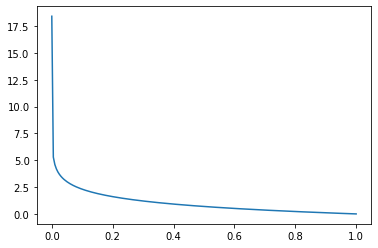

In [85]:
import matplotlib.pyplot as plt
x = np.linspace(0.00000001,1, 200).astype('float32')
y = -np.log(x).astype('float32')
plt.plot(x,y)

In [86]:
# Gradient Calculation
dw = np.zeros(w.shape)
num_classes = w.shape[1]
num_train = x.shape[0]
loss = 0.0
for i in range(num_train):
    scores = x[i].dot(w)
    #print(scores)
    correct_class_score = scores[y[i]]
    #print(correct_class_score)
    for j in range(num_classes):
        if j == y[i]:
            continue
        margin = scores[j] - correct_class_score +1 # note delta = 1
        #print(margin)
        if margin > 0:
            loss += margin
            dw[:,j] = margin*x[i]

AttributeError: 'numpy.float32' object has no attribute 'dot'

In [ ]:
dw.shape

In [87]:
dw

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [57]:
sw = sss.copy()

In [58]:
X_mask = np.zeros(sw.shape)
X_mask[sw > 0] = 1
X_mask[np.arange(3), y] = -np.sum(X_mask, axis=1)

In [59]:
sss

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.86563772],
       [25.84001435,  0.        ,  0.        ,  0.        , 22.42206425,
        20.37512416,  0.        ,  0.        , 30.60786149, 30.72827462],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  3.89359399,  0.        ]])

In [61]:
X_mask

array([[ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.],
       [ 1., -5.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.]])

In [68]:
#SGD
np.random.choice(100,3)

array([39,  7, 74])

In [88]:
x = np.random.randn(10,15)

In [90]:
x[np.random.choice(10,3)]

array([[-1.38950996,  1.6157862 ,  1.24352835, -1.82858188, -0.97036521,
         1.37779302,  0.51571518, -0.03597312, -0.4140637 , -0.68549996,
        -0.36394152,  1.34503554, -0.37495877, -1.07042517, -0.86175733],
       [ 1.65385318, -0.66779696,  0.48701054, -0.08684477,  0.95893646,
        -1.64709333, -0.93155295, -0.78197446, -1.31080634,  0.07793305,
         0.13202721, -3.51377554, -0.01308012,  1.07373996, -1.7551015 ],
       [-0.07610004, -0.96466483, -0.89598957, -0.27521005, -0.25791202,
        -0.59678476, -0.73415947,  0.61944525,  2.79166469, -1.25465235,
         0.96247916, -0.82145087,  2.25517335, -1.28373214,  0.94408864]])

In [114]:
1e-7

1e-07

In [117]:
5e-7*10000000

5.0

In [118]:
2e4

20000.0

In [121]:
#SOftmax
x = np.array([[1,2,3,4],[4,5,6,7]])

In [127]:
y = np.array([[2],[3]])

In [128]:
x/y

array([[0.5       , 1.        , 1.5       , 2.        ],
       [1.33333333, 1.66666667, 2.        , 2.33333333]])

In [129]:
y.shape

(2, 1)

In [131]:
np.amax(x, axis=1)

array([4, 7])

In [133]:
num_train = x.shape[0]
num_classes = w.shape[1]
score = x.dot(w)

In [134]:
score

array([[ 1.23171025e+01,  1.78216592e+00,  1.64071782e+01,
        -5.04746082e+00, -2.46634054e+01, -1.26835120e+01,
        -1.48968565e+00,  5.32536889e+00,  1.86629907e+01,
         3.22327033e+01],
       [ 2.70114960e+01,  9.39146281e-01,  3.23780447e+01,
        -1.23282021e+01, -5.05085907e+01, -3.00177570e+01,
        -9.07133412e+00,  9.73978704e+00,  2.92185289e+01,
         6.60899983e+01],
       [ 4.17058895e+01,  9.61266459e-02,  4.83489113e+01,
        -1.96089433e+01, -7.63537759e+01, -4.73520019e+01,
        -1.66529826e+01,  1.41542052e+01,  3.97740670e+01,
         9.99472934e+01]])

In [136]:
maxValues = np.amax(score, axis=1)
print(maxValues)

[32.23270328 66.08999835 99.94729341]


In [168]:
maxV = np.tile(maxValues,(num_classes,1))
print(maxV.T)

[[32.23270328 32.23270328 32.23270328 32.23270328 32.23270328 32.23270328
  32.23270328 32.23270328 32.23270328 32.23270328]
 [66.08999835 66.08999835 66.08999835 66.08999835 66.08999835 66.08999835
  66.08999835 66.08999835 66.08999835 66.08999835]
 [99.94729341 99.94729341 99.94729341 99.94729341 99.94729341 99.94729341
  99.94729341 99.94729341 99.94729341 99.94729341]]


In [169]:
score_n = score - maxV.T
score_n

array([[ -19.91560081,  -30.45053737,  -15.82552509,  -37.2801641 ,
         -56.89610867,  -44.91621531,  -33.72238894,  -26.9073344 ,
         -13.56971257,    0.        ],
       [ -39.07850235,  -65.15085207,  -33.71195362,  -78.4182004 ,
        -116.59858901,  -96.10775533,  -75.16133247,  -56.35021131,
         -36.87146949,    0.        ],
       [ -58.24140389,  -99.85116677,  -51.59838215, -119.5562367 ,
        -176.30106936, -147.29929536, -116.600276  ,  -85.79308822,
         -60.17322642,    0.        ]])

In [171]:
p_score = np.exp(score_n)
sums = np.sum(p_score, axis=1)
p_score

array([[2.24266531e-09, 5.96347840e-14, 1.33986727e-07, 6.44808045e-17,
        1.95134457e-25, 3.11268766e-20, 2.26231236e-15, 2.06202131e-12,
        1.27864125e-06, 1.00000000e+00],
       [1.06763320e-17, 5.07392982e-29, 2.28604390e-15, 8.77825687e-35,
        2.30078583e-51, 1.82361095e-42, 2.27954440e-33, 3.36832644e-25,
        9.70340725e-17, 1.00000000e+00],
       [5.08252674e-26, 4.31707170e-44, 3.90038390e-23, 1.19505013e-52,
        2.71280405e-77, 1.06838760e-64, 2.29690770e-51, 5.50218514e-38,
        7.36376310e-27, 1.00000000e+00]])

In [188]:
softmax = p_score/sums.reshape(sums.shape[0],1)
softmax

array([[2.24266213e-09, 5.96346996e-14, 1.33986537e-07, 6.44807133e-17,
        1.95134181e-25, 3.11268326e-20, 2.26230916e-15, 2.06201839e-12,
        1.27863944e-06, 9.99998585e-01],
       [1.06763320e-17, 5.07392982e-29, 2.28604390e-15, 8.77825687e-35,
        2.30078583e-51, 1.82361095e-42, 2.27954440e-33, 3.36832644e-25,
        9.70340725e-17, 1.00000000e+00],
       [5.08252674e-26, 4.31707170e-44, 3.90038390e-23, 1.19505013e-52,
        2.71280405e-77, 1.06838760e-64, 2.29690770e-51, 5.50218514e-38,
        7.36376310e-27, 1.00000000e+00]])

In [191]:
softmax_loss = softmax[range(num_train),y]
softmax_loss

array([3.11268326e-20, 5.07392982e-29, 1.00000000e+00])

In [193]:
dscores = softmax_loss - 1
dscores /= num_train
dW = np.dot(x.T, dscores)


In [194]:
dW.shape

(8,)